## Wizualizacja danych

Środowisko języka Python udostępnia [wiele narzędzi do wizualizacji danych](https://www.anaconda.com/blog/python-data-visualization-2018-why-so-many-libraries), ale kluczowy jest [dobór odpowiedniego rodzaju wykresu](https://sigmavalue.blog/wykresy-w-six-sigma/) niezaleznie od stosowanego narzędzia.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Matplotlib 
https://matplotlib.org/

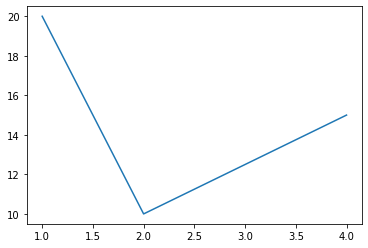

In [2]:
x = [1,2,4]
y = [20,10,15]
plt.plot(x,y);

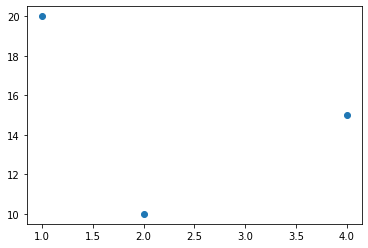

In [3]:
plt.scatter(x,y);

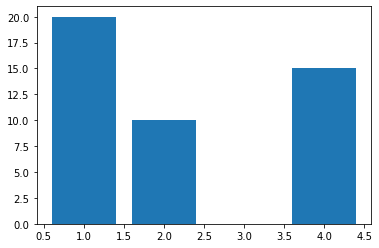

In [4]:
plt.bar(x,y);

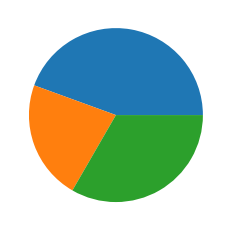

In [5]:
plt.pie(y);

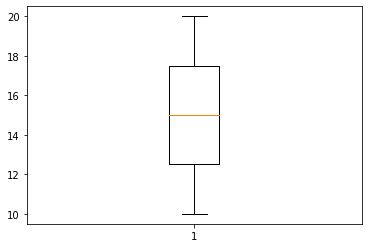

In [6]:
plt.boxplot(y); 

Personalizacja wykresów jest [dobrze udokumentowana](https://matplotlib.org/stable/tutorials/introductory/pyplot.html#), ale na początek dobrze jest zrozumieć [z jakich elementów składa się wykres](https://matplotlib.org/stable/_images/anatomy.png).

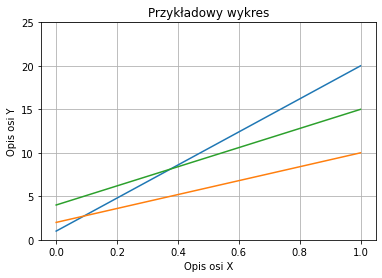

In [7]:
plt.plot([x,y])
plt.grid(True)
plt.ylim(0,25)
plt.xlabel('Opis osi X')
plt.ylabel('Opis osi Y')
plt.title('Przykładowy wykres'); 

Wykorzystajmy większe zbiory danych do wizualizacji.

In [28]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [9]:
loty = sns.load_dataset('flights')
loty.head()

year     month  passengers
0  1949   January         112
1  1949  February         118
2  1949     March         132
3  1949     April         129
4  1949       May         121

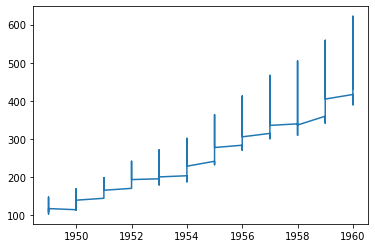

In [10]:
plt.plot(loty.year, loty.passengers);

Co z wykresem powyżej jest nie tak?

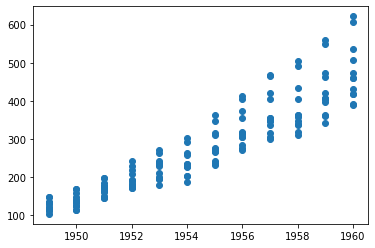

In [11]:
plt.scatter(loty.year, loty.passengers);

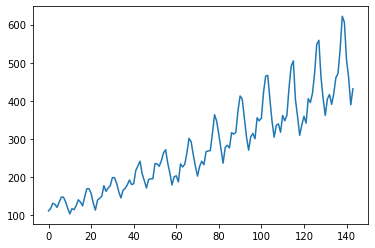

In [12]:
plt.plot(loty.passengers);

Zrozumienie danych jest kluczowe dla poprawnej wizualizacji. 

### Seaborn 
https://seaborn.pydata.org/

In [13]:
loty.pivot('year', 'month', 'passengers')

month  January  February  March  April  May  June  July  August  September  \
year                                                                         
1949       112       118    132    129  121   135   148     148        136   
1950       115       126    141    135  125   149   170     170        158   
1951       145       150    178    163  172   178   199     199        184   
1952       171       180    193    181  183   218   230     242        209   
1953       196       196    236    235  229   243   264     272        237   
1954       204       188    235    227  234   264   302     293        259   
1955       242       233    267    269  270   315   364     347        312   
1956       284       277    317    313  318   374   413     405        355   
1957       315       301    356    348  355   422   465     467        404   
1958       340       318    362    348  363   435   491     505        404   
1959       360       342    406    396  420   472   548     559        463   
1960       417       391    419    461  472   535   622     606        508   

month  October  November  December  
year                                
1949       119       104       118  
1950       133       114       140  
1951       162       146       166  
1952       191       172       194  
1953       211       180       201  
1954       229       203       229  
1955       274       237       278  
1956       306       271       306  
1957       347       305       336  
1958       359       310       337  
1959       407       362       405  
1960       461       390       432

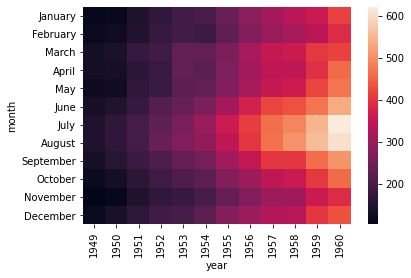

In [14]:
loty_mc = loty.pivot('month', 'year', 'passengers')
sns.heatmap(loty_mc);

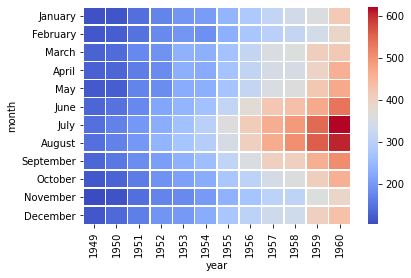

In [15]:
sns.heatmap(loty_mc, linewidths=.4, cmap='coolwarm');

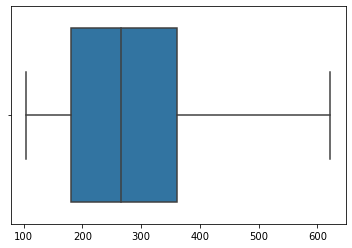

In [16]:
sns.boxplot(loty_mc);

Jak radzić sobie z błędami. Tutaj stara wersja biblioteki Seaborn, która uległa zmianie.

In [30]:
sns.__version__

'0.10.1'

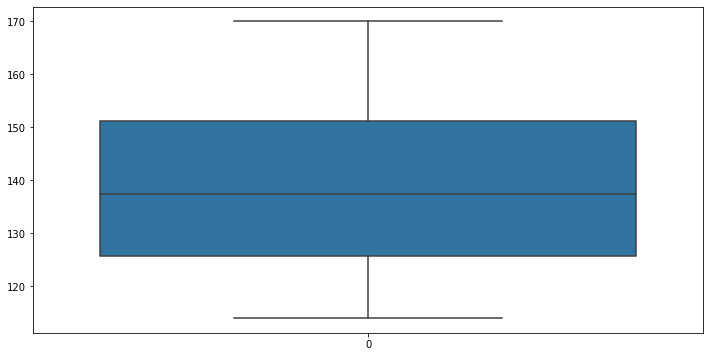

In [29]:
sns.boxplot(data=loty_mc[1950]);

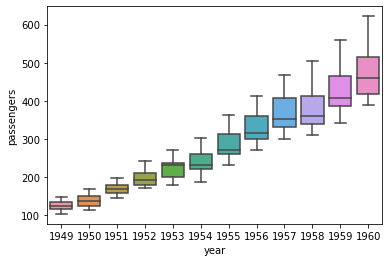

In [17]:
sns.boxplot(x='year', y='passengers', data=loty);

Opcjonalne zdefiniowanie domyśnych parametrów wykresów.

In [18]:
plt.rcParams['figure.figsize'] = [12, 6]

#### Zapisywanie grafik jako pliki

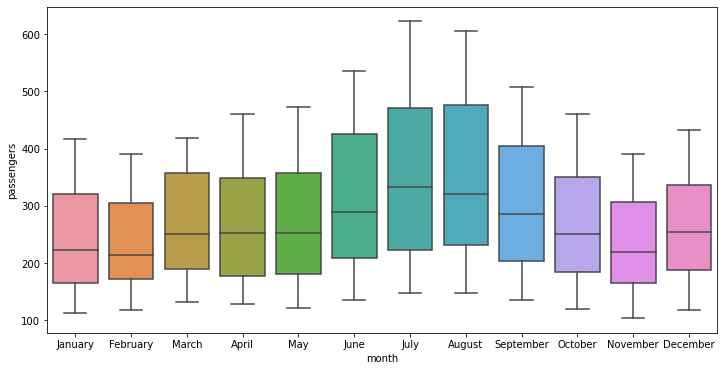

In [19]:
loty_miesiacami = sns.boxplot(x='month', y='passengers', data=loty);
fig = loty_miesiacami.get_figure()
fig.savefig('loty-miesiacami_seaborn.png')

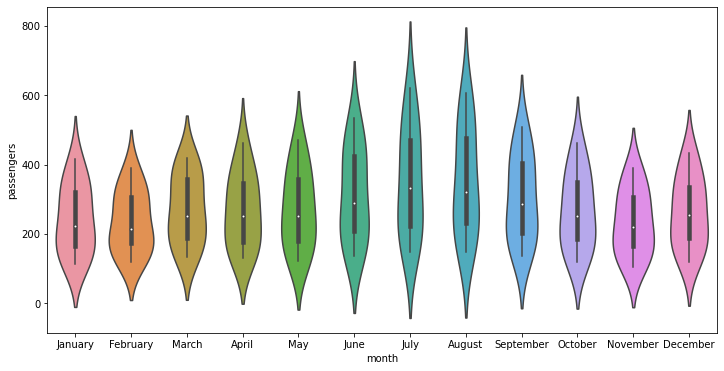

In [20]:
sns.violinplot(x='month', y='passengers', data=loty);

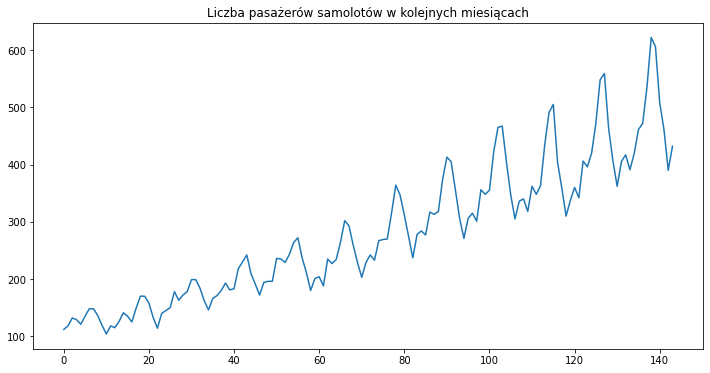

In [21]:
plt.plot(loty.passengers);
plt.title('Liczba pasażerów samolotów w kolejnych miesiącach')
plt.savefig('loty-matplotlib.png')

#### Kilka wykresów na jednym rysunku

In [22]:
loty[loty.year==1950]

year      month  passengers
12  1950    January         115
13  1950   February         126
14  1950      March         141
15  1950      April         135
16  1950        May         125
17  1950       June         149
18  1950       July         170
19  1950     August         170
20  1950  September         158
21  1950    October         133
22  1950   November         114
23  1950   December         140

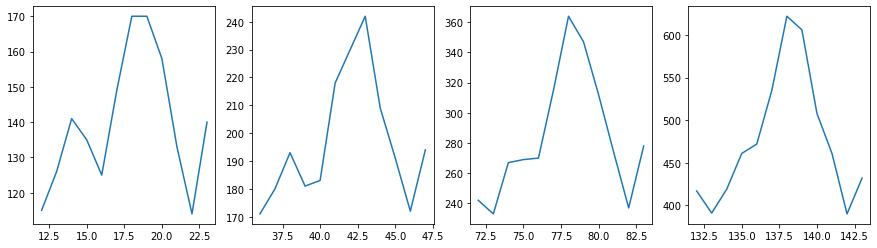

In [23]:
fig, axes = plt.subplots(1, 4, figsize=[15,4])
for i, rok in enumerate([1950, 1952, 1955, 1960]):
    fig.axes[i].plot(loty[loty.year==rok].passengers);

Dopracowanie wykresów to zwykle ostatni krok.

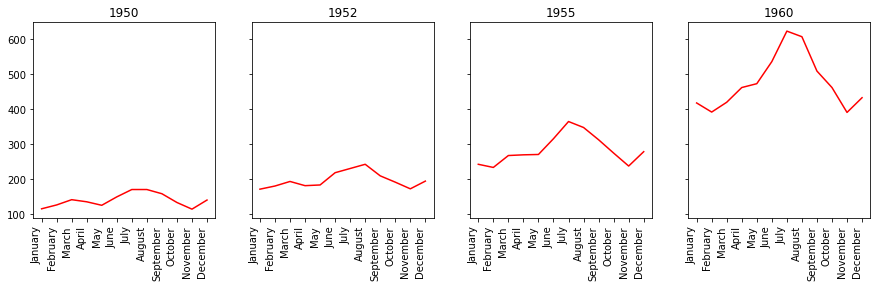

In [24]:
fig, axes = plt.subplots(1, 4, figsize=[15,4], sharey=True)
fig.autofmt_xdate(rotation=90)
for i, rok in enumerate([1950, 1952, 1955, 1960]):
    fig.axes[i].plot(loty[loty.year==rok].month, loty[loty.year==rok].passengers, c='red');
    fig.axes[i].set_title(rok)    

### Interaktywność z IPython

In [25]:
from IPython.display import display
from ipywidgets import interact, interactive
import ipywidgets as widgets

In [26]:
def rysuj(rok):
    plt.plot(loty[loty.year==rok].month, loty[loty.year==rok].passengers, 
             c='red', label=f'Dany rok - {rok}');
    plt.plot(loty[loty.year==rok-1].month, loty[loty.year==rok-1].passengers, 
             c='blue', label=f'Rok poprzedni - {rok -1}');
    plt.legend()

w = interactive(rysuj, rok=widgets.IntSlider(min=1950, max=1960, value=1955, step=1))
display(w)

interactive(children=(IntSlider(value=1955, description='rok', max=1960, min=1950), Output()), _dom_classes=('…

#### Więcej informacji

* https://bulldogjob.pl/news/1161-zaawansowana-wizualizacja-danych-z-matplotlib-w-pythonie
* https://coderzcolumn.com/tutorials/python/interactive-widgets-in-jupyter-notebook-using-ipywidgets
* https://docs.bokeh.org/en/latest/docs/user_guide/jupyter.html
* https://plotnine.readthedocs.io/en/stable/